# Pymaceuticals Inc.
---

### Analysis

- In this assignment I found that mice on a Capomulin and Ramicane treatments on average have a smaller tumor size that those on a Infubinol and Ceftamin treatments. I also found that Ceftamin has a high interquartile range when compared to mice taking Capomulin, Ramicane, and Infubinol. Finally, I found that in the data of mice taking Infubinol there was a major outlier in the Box Plot. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
raw_study_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
raw_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(raw_study_data["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = raw_study_data.loc[raw_study_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = raw_study_data.loc[raw_study_data["Mouse ID"]=="g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data = raw_study_data[raw_study_data["Mouse ID"].isin(duplicate_mouse_ids)==False]

In [6]:
# Checking the number of mice in the clean DataFrame.
len(study_data["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
t_mean = study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
t_median = study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
t_variance = study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
t_std = study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
t_sem = study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

tumor_summary = pd.DataFrame({
    "Tumor Volume Mean": t_mean,
    "Tumor Volume Median": t_median,
    "Tumor Volume Variance": t_variance,
    "Median Tumor Std. Dev.": t_std,
    "Median Tumor Std. Err.": t_sem})
tumor_summary

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Median Tumor Std. Dev.,Median Tumor Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
study_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

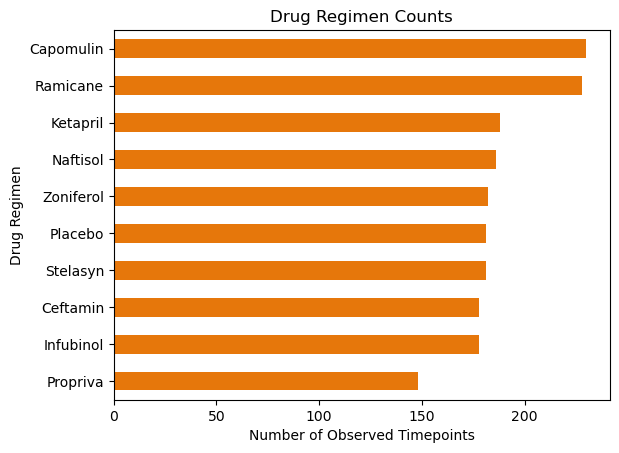

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
data = study_data["Drug Regimen"].value_counts().sort_values().plot(kind="barh", title="Drug Regimen Counts", color="#e6770b")
plt.xlabel("Number of Observed Timepoints")
plt.ylabel("Drug Regimen")
plt.show

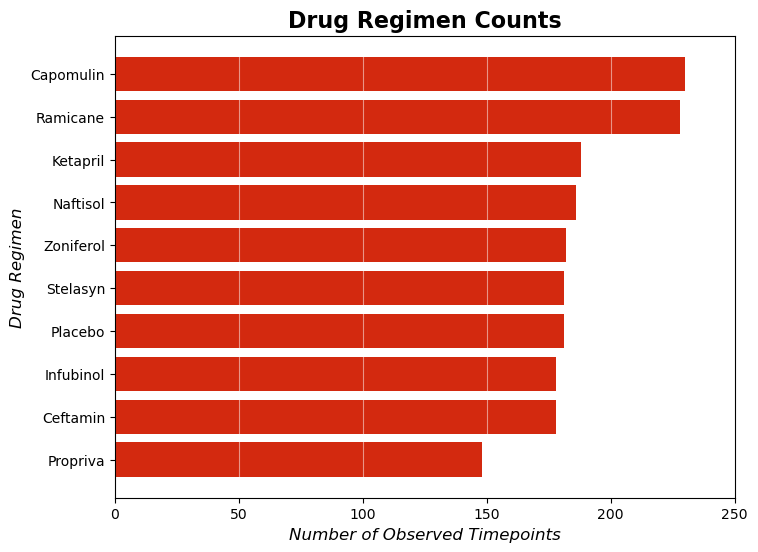

In [10]:
# Step 1: Get the data (x, y)
data = study_data["Drug Regimen"].value_counts()
x = np.flip(data.index)
y = np.flip(data.values)

# Step 2: Create the Canvas
plt.figure(figsize=(8,6))

# Step 3: Create the skeleton plot
plt.barh(x, y, color="#d3290f")

# Step 4: Customization
plt.ylabel("Drug Regimen", fontsize=12, fontstyle="italic")
plt.xlabel("Number of Observed Timepoints", fontsize=12, fontstyle="italic")
plt.title("Drug Regimen Counts", fontsize=16, fontweight="bold")
plt.xlim(0, 250)

plt.grid(axis="x", color="white", alpha=0.5)

# Step 5: Show/Save
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

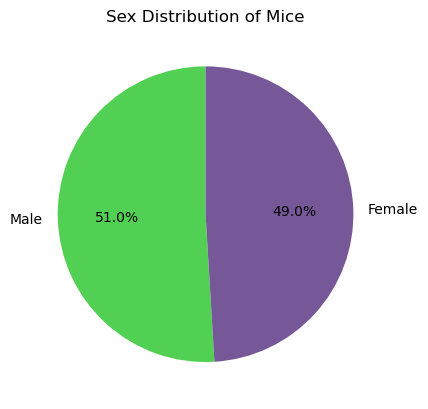

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
colors = ["#52d053","#765898"]
data = study_data["Sex"].value_counts()
data.plot(kind="pie", autopct="%1.1f%%", colors=colors, title="Sex Distribution of Mice", ylabel="", startangle=90)
plt.show

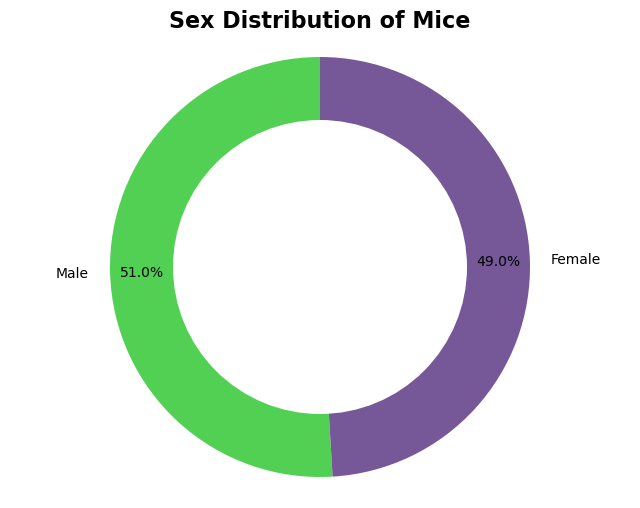

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Step 1: Get the data
data = study_data["Sex"].value_counts()
labels = data.index
colors = ["#52d053","#765898"]

# Step 2: Make the canvas
plt.figure(figsize=(8, 6))

# Step 3: Make the plot
plt.pie(data, labels=labels, colors=colors, autopct="%1.1f%%", shadow=False, startangle=90, pctdistance=0.85)

# Step 3.5: Add in the donut hole
# draw circle
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(center_circle)

# Step 4: Customizations
plt.title("Sex Distribution of Mice", fontweight="bold", fontsize=16)
plt.axis("equal")

# Step 5: Save/Show
plt.show()

## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = study_data.groupby(["Mouse ID"])["Timepoint"].max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = max_tumor.merge(study_data, on=["Mouse ID", "Timepoint"], how="left")
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [38]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"({drug} potential outliers: {outliers})")

(Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64))
(Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64))
(Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64)
(Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64))


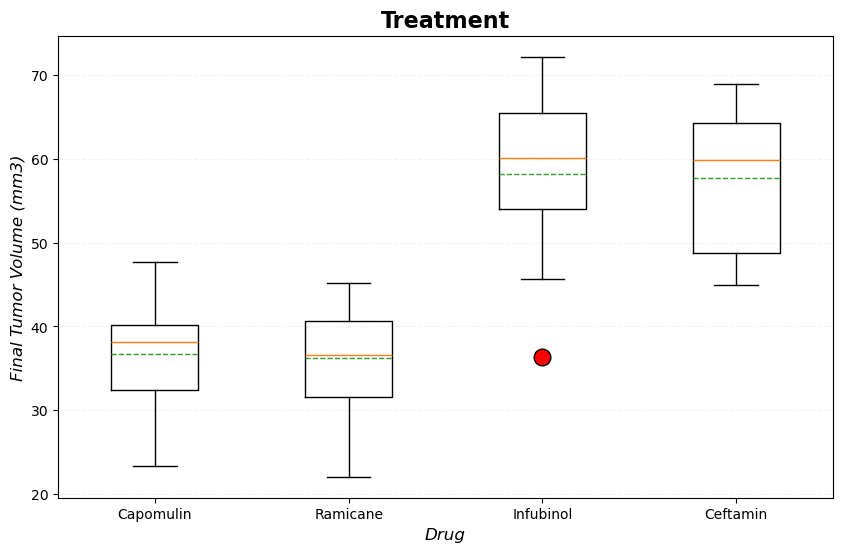

In [40]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Step 1: Get the Data
red_out = dict(markerfacecolor="red", markersize=12)

# Step 2: Create the Canvas
plt.figure(figsize=(10, 6))

# Step 3: Create the basic plot
plt.boxplot(tumor_vol_list, labels=treatments, flierprops=red_out, meanline=True, showmeans=True)

# Step 4: customize
plt.xlabel("Drug", fontstyle="italic", fontsize=12)
plt.ylabel("Final Tumor Volume (mm3)", fontstyle="italic", fontsize=12)
plt.title("Treatment", fontsize=16, fontweight="bold")

plt.grid(color="lightgrey", axis="y", linestyle="--", alpha=0.25)
# Step 5: show/save
plt.show()

## Line and Scatter Plots

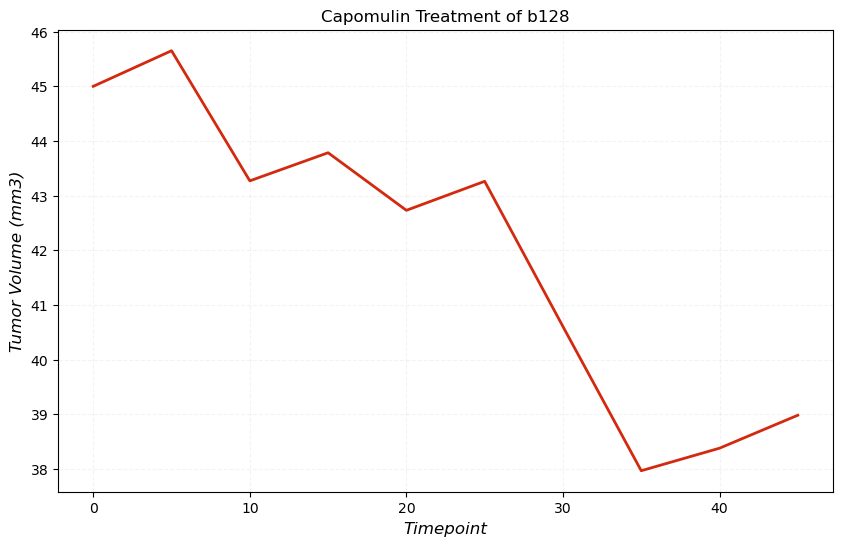

In [70]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_table = study_data.loc[study_data["Drug Regimen"] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table["Mouse ID"] == "b128"]

plt.figure(figsize=(10, 6))
plt.plot(mousedata["Timepoint"], mousedata["Tumor Volume (mm3)"], color="#d3290f", linewidth=2)
plt.xlabel("Timepoint", fontsize=12, fontstyle="italic")
plt.ylabel("Tumor Volume (mm3)", fontsize=12, fontstyle="italic")
plt.title("Capomulin Treatment of b128")

plt.grid(color="lightgrey", linestyle="--", alpha=0.25)

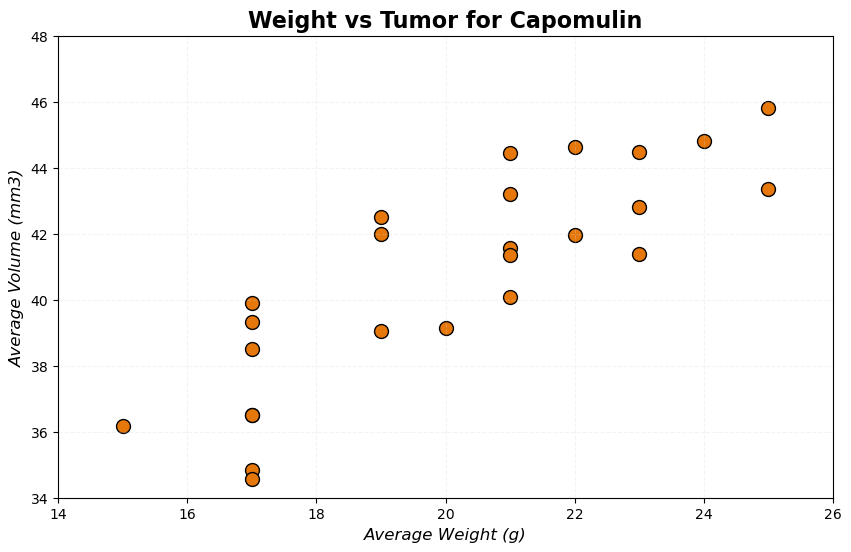

In [81]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_table = study_data.loc[study_data["Drug Regimen"] == "Capomulin"]
capomulin_average = capomulin_table.groupby("Mouse ID").agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"}).reset_index()
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"], facecolor="#e6770b", edgecolor="black", s=100)
plt.xlabel("Average Weight (g)", fontsize=12, fontstyle="italic")
plt.ylabel("Average Volume (mm3)", fontsize=12, fontstyle="italic")
plt.title("Weight vs Tumor Volume for Capomulin", fontweight="bold", fontsize=16)
plt.xlim(14, 26)
plt.ylim(34, 48)



plt.grid(color="lightgrey", linestyle="--", alpha=0.25)

plt.show()

## Correlation and Regression

In [71]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Modelling libraries
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [72]:
coors = capomulin_average.corr(numeric_only=True)
coors

,Weight (g),Tumor Volume (mm3)
Weight (g),1.000000,0.841936
Tumor Volume (mm3),0.841936,1.000000


y = 0.95x + 21.55
The r-squared is: 0.7088568047708723


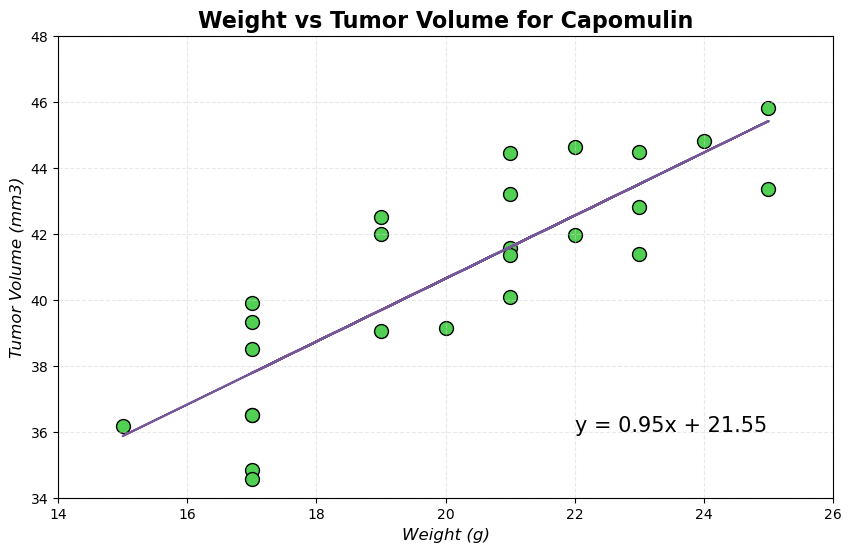

In [82]:
x_values = capomulin_average["Weight (g)"]
y_values = capomulin_average["Tumor Volume (mm3)"]

# makes the line of best fit
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# make the plot
# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x_values, y_values, facecolor="#52d053", edgecolor="black", s=100)
plt.plot(x_values, regress_values, "#765898")

# Step 4: Customizations
plt.xlabel("Weight (g)", fontsize=12, fontstyle="italic")
plt.ylabel("Tumor Volume (mm3)", fontsize=12, fontstyle="italic")
plt.title("Weight vs Tumor Volume for Capomulin", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
plt.xlim(14, 26)
plt.ylim(34, 48)

plt.annotate(line_eq,(22, 36),fontsize=15,color="black")

print(f"The r-squared is: {rvalue**2}")
plt.show()